### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [3]:
import pandas as pd

drug_df = pd.read_csv("data/drugLibTrain_raw.tsv", sep="\t")
drug_df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [4]:
drug_df.dtypes

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object

In [5]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [7]:
drug_df.describe(include="all")

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features = ["effectiveness", "sideEffects"]
target = ["rating"]

In [9]:
drug_df[features].describe(include="all")

,effectiveness,sideEffects
count,3107,3107
unique,5,5
top,Highly Effective,Mild Side Effects
freq,1330,1019


In [11]:
drug_df["effectiveness"].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [12]:
drug_df["sideEffects"].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [15]:
pd.get_dummies(drug_df["effectiveness"])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
3102,False,True,False,False,False
3103,False,False,True,False,False
3104,False,False,False,True,False
3105,True,False,False,False,False


In [16]:
df_dummy_effectiveness = pd.get_dummies(drug_df["effectiveness"], dtype="int")

In [17]:
df_dummy_sideEffects = pd.get_dummies(drug_df["sideEffects"], dtype="int")

In [25]:
X = pd.concat([df_dummy_effectiveness, df_dummy_sideEffects, drug_df["rating"]], axis=1)
X

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating
0,0,1,0,0,0,0,1,0,0,0,4
1,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,1,0,10
3,0,0,0,1,0,0,1,0,0,0,3
4,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,10
3103,0,0,1,0,0,1,0,0,0,0,1
3104,0,0,0,1,0,0,0,1,0,0,2
3105,1,0,0,0,0,0,1,0,0,0,8


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rand_state = 42

models = []
for k in range(2, 100):
    km = KMeans(n_clusters=k, random_state=rand_state)
    km.fit(X)
    models.append(km)

In [38]:
inertias = [m.inertia_ for m in models]

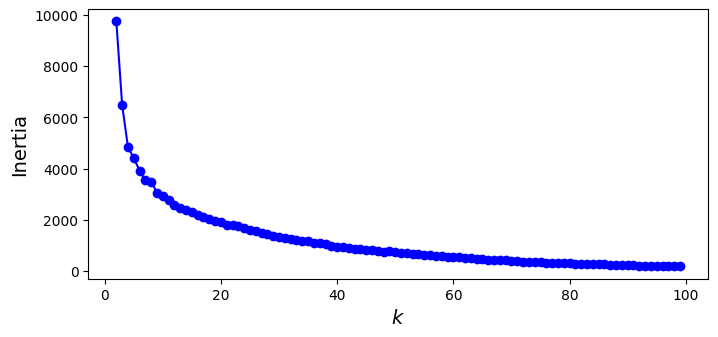

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 100), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [43]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in models]
silhouette_score_list

[np.float64(0.6055089618561077),
 np.float64(0.45301977160140894),
 np.float64(0.39817528676924296),
 np.float64(0.3777149532566565),
 np.float64(0.35456362618162285),
 np.float64(0.3704229125720001),
 np.float64(0.34672148298944344),
 np.float64(0.4207723398684703),
 np.float64(0.43583439306301885),
 np.float64(0.4455993444041647),
 np.float64(0.4492777927271139),
 np.float64(0.47898179101908644),
 np.float64(0.4711354152434574),
 np.float64(0.47022974159008896),
 np.float64(0.4676285855845827),
 np.float64(0.4947903379563803),
 np.float64(0.5093472759764301),
 np.float64(0.5162173632874552),
 np.float64(0.5193117349019889),
 np.float64(0.5322169821311803),
 np.float64(0.5405477080449346),
 np.float64(0.5425623434685986),
 np.float64(0.5541309383876297),
 np.float64(0.5681070564818432),
 np.float64(0.5706526645965764),
 np.float64(0.5840712154888079),
 np.float64(0.5879331431931408),
 np.float64(0.5988769349925553),
 np.float64(0.6151682400637908),
 np.float64(0.6174652841363696),
 np

Text(0, 0.5, 'silhouette_score')

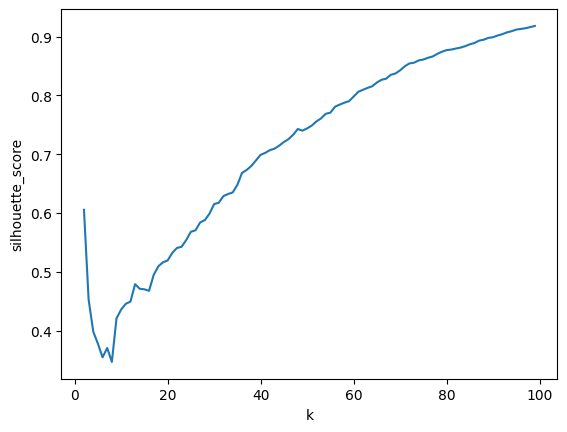

In [44]:
plt.plot(range(2,100), silhouette_score_list)
plt.xlabel("k")
plt.ylabel("silhouette_score")

In [52]:
df_cluster = X.copy()
df_cluster['cluster'] = models[2].labels_
df_cluster

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating,cluster
0,0,1,0,0,0,0,1,0,0,0,4,2
1,0,1,0,0,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,0,0,1,0,10,3
3,0,0,0,1,0,0,1,0,0,0,3,1
4,0,0,0,1,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,10,3
3103,0,0,1,0,0,1,0,0,0,0,1,1
3104,0,0,0,1,0,0,0,1,0,0,2,1
3105,1,0,0,0,0,0,1,0,0,0,8,0


In [53]:
df_cluster['cluster'].value_counts()

cluster
0    1100
3    1030
1     554
2     423
Name: count, dtype: int64

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

<Axes: ylabel='count'>

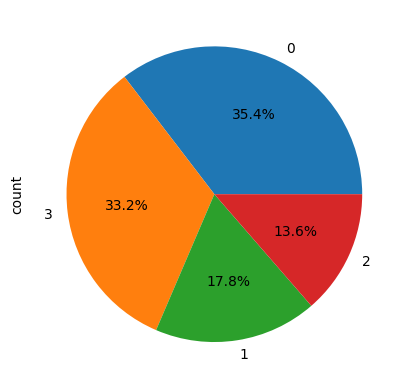

In [54]:
df_cluster['cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [55]:
df_cluster.groupby("cluster").describe()

Considerably Effective                                               \
                         count      mean       std  min  25%  50%  75%  max   
cluster                                                                       
0                       1100.0  0.629091  0.483268  0.0  0.0  1.0  1.0  1.0   
1                        554.0  0.138989  0.346248  0.0  0.0  0.0  0.0  1.0   
2                        423.0  0.241135  0.428278  0.0  0.0  0.0  0.0  1.0   
3                       1030.0  0.055340  0.228753  0.0  0.0  0.0  0.0  1.0   

        Highly Effective            ... Severe Side Effects       rating  \
                   count      mean  ...                 75%  max   count   
cluster                             ...                                    
0                 1100.0  0.225455  ...                 0.0  1.0  1100.0   
1                  554.0  0.099278  ...                 1.0  1.0   554.0   
2                  423.0  0.144208  ...                 0.0  1.0   423.0   
3                 1030.0  0.937864  ...                 0.0  1.0  1030.0   

                                                         
             mean       std  min  25%   50%   75%   max  
cluster                                                  
0        7.856364  0.687405  7.0  7.0   8.0   8.0   9.0  
1        1.712996  0.856173  1.0  1.0   1.0   3.0   3.0  
2        5.118203  0.782040  4.0  4.0   5.0   6.0   6.0  
3        9.720388  0.449026  9.0  9.0  10.0  10.0  10.0  

[4 rows x 88 columns]

In [56]:
df_cluster['cluster'].value_counts()

cluster
0    1100
3    1030
1     554
2     423
Name: count, dtype: int64

In [58]:
import numpy as np

pd.DataFrame(np.round(models[2].cluster_centers_, 2), columns=X.columns)

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating
0,0.63,0.23,-0.00,0.01,0.14,0.00,0.44,0.24,0.26,0.05,7.86
1,0.14,0.10,0.42,0.19,0.14,0.29,0.06,0.18,0.08,0.39,1.71
2,0.24,0.14,0.03,0.17,0.42,0.01,0.22,0.42,0.15,0.20,5.12
3,0.06,0.94,-0.00,0.00,0.01,0.00,0.39,0.07,0.52,0.01,9.72


In [59]:
from sklearn.tree import DecisionTreeClassifier

X_tree = df_cluster.drop(columns="cluster")
y_tree = df_cluster["cluster"]

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_tree, y_tree)

DecisionTreeClassifier(max_depth=4)

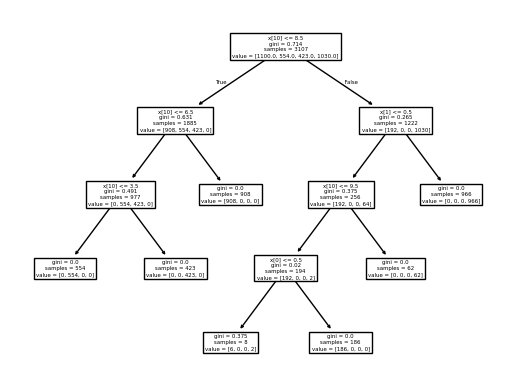

In [62]:
from sklearn.tree import plot_tree

plot_tree(clf);

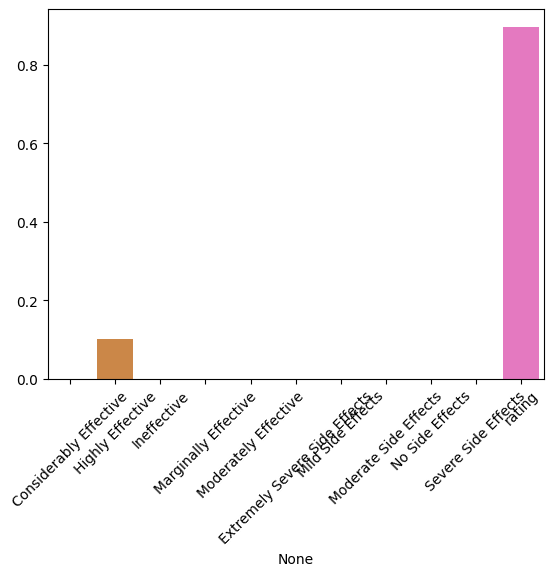

In [68]:
import seaborn as sns

sns.barplot(x=X_tree.columns, y=clf.feature_importances_, hue=X_tree.columns)
plt.xticks(rotation=45);